<a href="https://colab.research.google.com/github/OJB-Quantum/Notebooks-for-Ideas/blob/main/Animation_of_Discrete_vs_Continuous_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

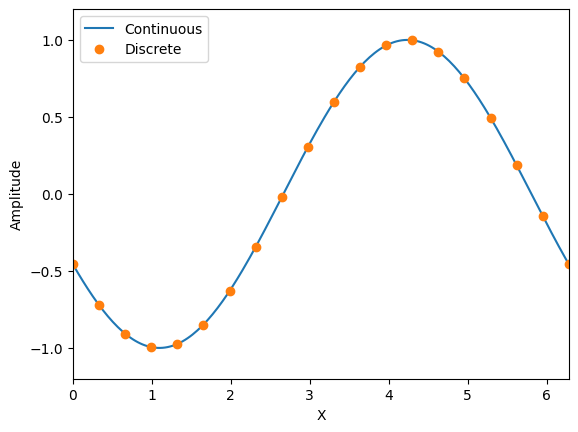

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

# Create a figure and axis
fig, ax = plt.subplots()

# Generate a set of x-values for the continuous wave
x_cont = np.linspace(0, 2 * np.pi, 200)

# Generate a smaller set of x-values for the discrete wave
x_disc = np.linspace(0, 2 * np.pi, 20)

# Initialize lines (continuous line, discrete markers)
line_cont, = ax.plot(x_cont, np.sin(x_cont), label="Continuous")
line_disc, = ax.plot(x_disc, np.sin(x_disc), 'o', label="Discrete")

# Set up the axes labels and legend
ax.set_xlim(0, 2 * np.pi)
ax.set_ylim(-1.2, 1.2)
ax.set_xlabel("X")
ax.set_ylabel("Amplitude")
ax.legend()

def init():
    """
    Initialize the animation by clearing or resetting
    anything that must be fresh each time.
    """
    line_cont.set_ydata([np.nan] * len(x_cont))
    line_disc.set_ydata([np.nan] * len(x_disc))
    return line_cont, line_disc

def animate(frame):
    """
    Update the sine wave (both continuous and discrete) by shifting
    them in time. The shift is small enough so you can see them 'wave'
    across the screen.
    """
    shift = frame * 0.1
    y_cont = np.sin(x_cont + shift)
    y_disc = np.sin(x_disc + shift)

    line_cont.set_ydata(y_cont)
    line_disc.set_ydata(y_disc)
    return line_cont, line_disc

# Create the animation
anim = FuncAnimation(
    fig,         # figure object
    animate,     # animation function
    init_func=init,
    frames=100,  # number of animation frames
    interval=100,  # delay between frames in milliseconds
    blit=True
)

# Display the animation as HTML
HTML(anim.to_jshtml())